<center> 
    
# **Proyecto**
    
# *Análisis y Visualización de Datos*

## **Integrante**
[Enrique Colmont](https://www.linkedin.com/in/enrique-colmont-villacres/)

[GITHUB LINK](https://github.com/ecolmont/Analisis_Datos)

## **1. Introducción**

El presente proyecto se desarrolla con el uso de información referente a sísmos registrados a nivel mundial entre 19 de mayo de 2023 y el 18 de junio de 2024, esta información es gestionada y proporcionada por la USGS, que es el centro federald de estudios geológicos de Estados Unidos. La infomación fue obtenida por medio de la pagina web de la USGS y descargada en formato CVS.


Se obtuvo un total 8,103 eventos registrados durante el periodo que serán procesados y analizados en el presente proyecto.

## **2. Objetivo**

Realizar un análisis de un conjunto de datos de elección libre, preferible con algún enfoque en geociencias, utilizando las librerías de Python numpy, pandas, matplotlib, seaborn, entre otras, para identificar tendencias y observaciones importantes de los datos.

In [1]:
#Importar librerias

In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **3. Metodología**

En este apartado se describen y se ejecutan las lineas de programación para el procesamiento de datos, el análisis exploratorio y la visualización de gráficos mediante la implementación de funciones y bucles

### *1. Carga y Preprocesamiento de los Datos*

Los datos elegidos corresponden a registros sísmicos de sudamerica, proporcionados por Ceresis

In [408]:
#Leer archivo CVS
datos = pd.read_csv('query(1).csv')
datos

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-06-18T18:46:59.399Z,-23.8157,-67.0322,226.342,4.6,mb,22.0,121.0,1.360,0.80,...,2024-06-18T19:55:58.040Z,"85 km WNW of San Antonio de los Cobres, Argentina",earthquake,11.84,9.673,0.245,5.0,reviewed,us,us
1,2024-06-18T17:11:01.576Z,-2.1881,-77.2275,145.518,4.6,mb,104.0,51.0,1.054,0.90,...,2024-06-18T19:49:01.040Z,"98 km ESE of Palora, Ecuador",earthquake,8.32,4.824,0.064,74.0,reviewed,us,us
2,2024-06-18T15:47:40.323Z,-17.0993,-71.1115,115.856,4.7,mb,48.0,134.0,1.462,1.23,...,2024-06-18T17:27:45.040Z,"21 km WNW of Moquegua, Peru",earthquake,6.46,8.264,0.071,60.0,reviewed,us,us
3,2024-06-18T13:42:55.315Z,35.2390,87.5539,10.000,4.5,mb,45.0,90.0,7.666,0.99,...,2024-06-18T15:33:54.040Z,western Xizang,earthquake,10.33,1.916,0.082,44.0,reviewed,us,us
4,2024-06-18T11:21:10.815Z,24.8435,125.3752,44.294,4.7,mb,39.0,115.0,1.136,1.25,...,2024-06-18T12:31:22.040Z,"8 km ENE of Hirara, Japan",earthquake,8.30,5.494,0.084,43.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8098,2023-05-19T03:03:47.964Z,-23.2314,171.0091,34.315,5.5,mb,31.0,111.0,4.372,0.90,...,2023-07-24T01:16:07.040Z,southeast of the Loyalty Islands,earthquake,11.37,2.840,0.135,19.0,reviewed,us,us
8099,2023-05-19T02:57:03.172Z,-23.2063,170.7423,18.053,7.7,mww,278.0,15.0,3.096,0.89,...,2023-07-24T01:16:07.040Z,southeast of the Loyalty Islands,earthquake,7.07,2.580,0.035,79.0,reviewed,us,us
8100,2023-05-19T01:58:21.762Z,12.8308,49.1511,10.000,4.5,mb,40.0,102.0,6.298,1.19,...,2023-07-24T01:16:08.040Z,"169 km NNW of Qandala, Somalia",earthquake,9.69,1.918,0.108,25.0,reviewed,us,us
8101,2023-05-19T00:58:33.938Z,-29.1083,-177.1131,10.000,4.6,mb,7.0,164.0,0.722,0.88,...,2023-07-24T01:16:08.040Z,"Kermadec Islands, New Zealand",earthquake,4.30,1.949,0.314,3.0,reviewed,us,us


#### **Información de los datos**

In [409]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8103 entries, 0 to 8102
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             8103 non-null   object 
 1   latitude         8103 non-null   float64
 2   longitude        8103 non-null   float64
 3   depth            8103 non-null   float64
 4   mag              8103 non-null   float64
 5   magType          8103 non-null   object 
 6   nst              8077 non-null   float64
 7   gap              8077 non-null   float64
 8   dmin             8075 non-null   float64
 9   rms              8103 non-null   float64
 10  net              8103 non-null   object 
 11  id               8103 non-null   object 
 12  updated          8103 non-null   object 
 13  place            8103 non-null   object 
 14  type             8103 non-null   object 
 15  horizontalError  8075 non-null   float64
 16  depthError       8103 non-null   float64
 17  magError      

#### **Existen columnas que se desean eliminar**

In [410]:
datos.drop(['id', 'nst', 'gap', 'rms','net', 'status'], axis=1, inplace=True)
datos

,time,latitude,longitude,depth,mag,magType,dmin,updated,place,type,horizontalError,depthError,magError,magNst,locationSource,magSource
0,2024-06-18T18:46:59.399Z,-23.8157,-67.0322,226.342,4.6,mb,1.360,2024-06-18T19:55:58.040Z,"85 km WNW of San Antonio de los Cobres, Argentina",earthquake,11.84,9.673,0.245,5.0,us,us
1,2024-06-18T17:11:01.576Z,-2.1881,-77.2275,145.518,4.6,mb,1.054,2024-06-18T19:49:01.040Z,"98 km ESE of Palora, Ecuador",earthquake,8.32,4.824,0.064,74.0,us,us
2,2024-06-18T15:47:40.323Z,-17.0993,-71.1115,115.856,4.7,mb,1.462,2024-06-18T17:27:45.040Z,"21 km WNW of Moquegua, Peru",earthquake,6.46,8.264,0.071,60.0,us,us
3,2024-06-18T13:42:55.315Z,35.2390,87.5539,10.000,4.5,mb,7.666,2024-06-18T15:33:54.040Z,western Xizang,earthquake,10.33,1.916,0.082,44.0,us,us
4,2024-06-18T11:21:10.815Z,24.8435,125.3752,44.294,4.7,mb,1.136,2024-06-18T12:31:22.040Z,"8 km ENE of Hirara, Japan",earthquake,8.30,5.494,0.084,43.0,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8098,2023-05-19T03:03:47.964Z,-23.2314,171.0091,34.315,5.5,mb,4.372,2023-07-24T01:16:07.040Z,southeast of the Loyalty Islands,earthquake,11.37,2.840,0.135,19.0,us,us
8099,2023-05-19T02:57:03.172Z,-23.2063,170.7423,18.053,7.7,mww,3.096,2023-07-24T01:16:07.040Z,southeast of the Loyalty Islands,earthquake,7.07,2.580,0.035,79.0,us,us
8100,2023-05-19T01:58:21.762Z,12.8308,49.1511,10.000,4.5,mb,6.298,2023-07-24T01:16:08.040Z,"169 km NNW of Qandala, Somalia",earthquake,9.69,1.918,0.108,25.0,us,us
8101,2023-05-19T00:58:33.938Z,-29.1083,-177.1131,10.000,4.6,mb,0.722,2023-07-24T01:16:08.040Z,"Kermadec Islands, New Zealand",earthquake,4.30,1.949,0.314,3.0,us,us


#### **Cambio de nombres de las columnas a Español**

In [411]:
datos.rename(columns={'time': 'fecha_y_hora', 'latitude': 'latitud', 'longitude': 'longitud','depth':'profundidad','mag':'magnitud','magType':'escala', 'updated':'actualización', 'place':'lugar', 
                      'type':'categoría','locationSource':'Ubi.Fuente'}, inplace=True)
datos

,fecha_y_hora,latitud,longitud,profundidad,magnitud,escala,dmin,actualización,lugar,categoría,horizontalError,depthError,magError,magNst,Ubi.Fuente,magSource
0,2024-06-18T18:46:59.399Z,-23.8157,-67.0322,226.342,4.6,mb,1.360,2024-06-18T19:55:58.040Z,"85 km WNW of San Antonio de los Cobres, Argentina",earthquake,11.84,9.673,0.245,5.0,us,us
1,2024-06-18T17:11:01.576Z,-2.1881,-77.2275,145.518,4.6,mb,1.054,2024-06-18T19:49:01.040Z,"98 km ESE of Palora, Ecuador",earthquake,8.32,4.824,0.064,74.0,us,us
2,2024-06-18T15:47:40.323Z,-17.0993,-71.1115,115.856,4.7,mb,1.462,2024-06-18T17:27:45.040Z,"21 km WNW of Moquegua, Peru",earthquake,6.46,8.264,0.071,60.0,us,us
3,2024-06-18T13:42:55.315Z,35.2390,87.5539,10.000,4.5,mb,7.666,2024-06-18T15:33:54.040Z,western Xizang,earthquake,10.33,1.916,0.082,44.0,us,us
4,2024-06-18T11:21:10.815Z,24.8435,125.3752,44.294,4.7,mb,1.136,2024-06-18T12:31:22.040Z,"8 km ENE of Hirara, Japan",earthquake,8.30,5.494,0.084,43.0,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8098,2023-05-19T03:03:47.964Z,-23.2314,171.0091,34.315,5.5,mb,4.372,2023-07-24T01:16:07.040Z,southeast of the Loyalty Islands,earthquake,11.37,2.840,0.135,19.0,us,us
8099,2023-05-19T02:57:03.172Z,-23.2063,170.7423,18.053,7.7,mww,3.096,2023-07-24T01:16:07.040Z,southeast of the Loyalty Islands,earthquake,7.07,2.580,0.035,79.0,us,us
8100,2023-05-19T01:58:21.762Z,12.8308,49.1511,10.000,4.5,mb,6.298,2023-07-24T01:16:08.040Z,"169 km NNW of Qandala, Somalia",earthquake,9.69,1.918,0.108,25.0,us,us
8101,2023-05-19T00:58:33.938Z,-29.1083,-177.1131,10.000,4.6,mb,0.722,2023-07-24T01:16:08.040Z,"Kermadec Islands, New Zealand",earthquake,4.30,1.949,0.314,3.0,us,us


#### **Ordenar valores por Fecha y Hora de manera ascendente**

In [412]:
datos.sort_values(by='fecha_y_hora', inplace=True, ignore_index=True)
datos

,fecha_y_hora,latitud,longitud,profundidad,magnitud,escala,dmin,actualización,lugar,categoría,horizontalError,depthError,magError,magNst,Ubi.Fuente,magSource
0,2023-05-19T00:57:30.812Z,-5.8023,147.4741,84.447,4.9,mb,3.593,2023-07-24T01:16:08.040Z,"93 km NNW of Finschhafen, Papua New Guinea",earthquake,4.49,6.680,0.042,182.0,us,us
1,2023-05-19T00:58:33.938Z,-29.1083,-177.1131,10.000,4.6,mb,0.722,2023-07-24T01:16:08.040Z,"Kermadec Islands, New Zealand",earthquake,4.30,1.949,0.314,3.0,us,us
2,2023-05-19T01:58:21.762Z,12.8308,49.1511,10.000,4.5,mb,6.298,2023-07-24T01:16:08.040Z,"169 km NNW of Qandala, Somalia",earthquake,9.69,1.918,0.108,25.0,us,us
3,2023-05-19T02:57:03.172Z,-23.2063,170.7423,18.053,7.7,mww,3.096,2023-07-24T01:16:07.040Z,southeast of the Loyalty Islands,earthquake,7.07,2.580,0.035,79.0,us,us
4,2023-05-19T03:03:47.964Z,-23.2314,171.0091,34.315,5.5,mb,4.372,2023-07-24T01:16:07.040Z,southeast of the Loyalty Islands,earthquake,11.37,2.840,0.135,19.0,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8098,2024-06-18T11:21:10.815Z,24.8435,125.3752,44.294,4.7,mb,1.136,2024-06-18T12:31:22.040Z,"8 km ENE of Hirara, Japan",earthquake,8.30,5.494,0.084,43.0,us,us
8099,2024-06-18T13:42:55.315Z,35.2390,87.5539,10.000,4.5,mb,7.666,2024-06-18T15:33:54.040Z,western Xizang,earthquake,10.33,1.916,0.082,44.0,us,us
8100,2024-06-18T15:47:40.323Z,-17.0993,-71.1115,115.856,4.7,mb,1.462,2024-06-18T17:27:45.040Z,"21 km WNW of Moquegua, Peru",earthquake,6.46,8.264,0.071,60.0,us,us
8101,2024-06-18T17:11:01.576Z,-2.1881,-77.2275,145.518,4.6,mb,1.054,2024-06-18T19:49:01.040Z,"98 km ESE of Palora, Ecuador",earthquake,8.32,4.824,0.064,74.0,us,us


#### **Separar datos de mes y día**

In [413]:
#función para separar el año, mes y día de la columna fecha_y_hora
def add_month_year(DataFrame, Columna):
    DataFrame[Columna] = pd.to_datetime(DataFrame[Columna])
    Mes = DataFrame[Columna].dt.month
    Anio = DataFrame[Columna].dt.year
    Dia = DataFrame[Columna].dt.day
    DataFrame.insert(1, 'dia', Dia)
    DataFrame.insert(2, 'mes', Mes)
    DataFrame.insert(3, 'año', Anio)
    
    return DataFrame

datos = add_month_year(datos,'fecha_y_hora')
datos

,fecha_y_hora,dia,mes,año,latitud,longitud,profundidad,magnitud,escala,dmin,actualización,lugar,categoría,horizontalError,depthError,magError,magNst,Ubi.Fuente,magSource
0,2023-05-19 00:57:30.812000+00:00,19,5,2023,-5.8023,147.4741,84.447,4.9,mb,3.593,2023-07-24T01:16:08.040Z,"93 km NNW of Finschhafen, Papua New Guinea",earthquake,4.49,6.680,0.042,182.0,us,us
1,2023-05-19 00:58:33.938000+00:00,19,5,2023,-29.1083,-177.1131,10.000,4.6,mb,0.722,2023-07-24T01:16:08.040Z,"Kermadec Islands, New Zealand",earthquake,4.30,1.949,0.314,3.0,us,us
2,2023-05-19 01:58:21.762000+00:00,19,5,2023,12.8308,49.1511,10.000,4.5,mb,6.298,2023-07-24T01:16:08.040Z,"169 km NNW of Qandala, Somalia",earthquake,9.69,1.918,0.108,25.0,us,us
3,2023-05-19 02:57:03.172000+00:00,19,5,2023,-23.2063,170.7423,18.053,7.7,mww,3.096,2023-07-24T01:16:07.040Z,southeast of the Loyalty Islands,earthquake,7.07,2.580,0.035,79.0,us,us
4,2023-05-19 03:03:47.964000+00:00,19,5,2023,-23.2314,171.0091,34.315,5.5,mb,4.372,2023-07-24T01:16:07.040Z,southeast of the Loyalty Islands,earthquake,11.37,2.840,0.135,19.0,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8098,2024-06-18 11:21:10.815000+00:00,18,6,2024,24.8435,125.3752,44.294,4.7,mb,1.136,2024-06-18T12:31:22.040Z,"8 km ENE of Hirara, Japan",earthquake,8.30,5.494,0.084,43.0,us,us
8099,2024-06-18 13:42:55.315000+00:00,18,6,2024,35.2390,87.5539,10.000,4.5,mb,7.666,2024-06-18T15:33:54.040Z,western Xizang,earthquake,10.33,1.916,0.082,44.0,us,us
8100,2024-06-18 15:47:40.323000+00:00,18,6,2024,-17.0993,-71.1115,115.856,4.7,mb,1.462,2024-06-18T17:27:45.040Z,"21 km WNW of Moquegua, Peru",earthquake,6.46,8.264,0.071,60.0,us,us
8101,2024-06-18 17:11:01.576000+00:00,18,6,2024,-2.1881,-77.2275,145.518,4.6,mb,1.054,2024-06-18T19:49:01.040Z,"98 km ESE of Palora, Ecuador",earthquake,8.32,4.824,0.064,74.0,us,us


#### **Identificar evento de mayor magnitud registrada**

In [414]:
#crear función para calcular la magnitud maxima contenida en la columna
def magnitud_max (df, columna):
    b=df.groupby("lugar")[columna].max()
    return b

Maxima = magnitud_max(datos, "magnitud")

print(f"El sismo de mayor magnitud registrado se dio en {Maxima.idxmax()} con una magnitud de {Maxima.max()} ")

El sismo de mayor magnitud registrado se dio en southeast of the Loyalty Islands con una magnitud de 7.7 


### 2. Análisis Exploratorio de Datos (EDA):

##### **ESCALA DE RICHTER**

La escala sismológica de **Richter**, también conocida como escala de magnitud local **(ML)**, es una escala que asigna un número para cuantificar la energía que libera un terremoto, denominada así en honor del sismólogo estadounidense Charles Francis Richter.

La sismología mundial usa esta escala para determinar las fuerzas de sismos de una magnitud entre **2,0 y 6,9** y de 0 a 400 kilómetros de profundidad. Aunque los medios de comunicación suelen confundir las escalas, para referirse a eventos telúricos actuales se considera incorrecto decir que un sismo «fue de magnitud superior a 7,0 en la escala de Richter», pues los sismos con magnitud superior a 6,9 se miden desde 1978 con la escala sismológica de magnitud de momento, por tratarse esta última de una escala que discrimina mejor en los valores extremos.

![Picture title](Imagen_escala_Richter.jpg)


**Indentificar la cantidad de sismos en el ultimo año por categorías**

In [415]:
def categorizar_sismo(magnitud):
    if magnitud < 2:
        return 'Baja'
    elif 2 <= magnitud < 6:
        return 'Moderada'
    elif 6 <= magnitud < 7:
        return 'Fuerte'
    elif 7 <= magnitud < 8:
        return 'Mayor'
    else:
        return 'Catastrófica'

datos['categoria_Richter'] = datos['magnitud'].apply(categorizar_sismo)

conteo_categorias = datos['categoria_Richter'].value_counts()

for categoria, conteo in conteo_categorias.items():
    if categoria == 'Baja':
        rango = "0 - <2"
    elif categoria == 'Moderada':
        rango = "2 - <6"
    elif categoria == 'Fuerte':
        rango = "6 - <7"
    elif categoria == 'Mayor':
        rango = "7 - <8"
    else:
        rango = ">8"
    
    print(f"* Entre mayo de 2023 y junio de 2024, en el mundo se han registrado {conteo} sismos de magnitudes entre {rango}, categoría {categoria}")
    
# datos

* Entre mayo de 2023 y junio de 2024, en el mundo se han registrado 7962 sismos de magnitudes entre 2 - <6, categoría Moderada
* Entre mayo de 2023 y junio de 2024, en el mundo se han registrado 130 sismos de magnitudes entre 6 - <7, categoría Fuerte
* Entre mayo de 2023 y junio de 2024, en el mundo se han registrado 11 sismos de magnitudes entre 7 - <8, categoría Mayor


**Categorización de sismos por Hipocentro**

El punto, en el interior de la Tierra, donde ocurre la ruptura que genera las ondas sísmicas, se denomina **hipocentro**, y el punto de la superficie terrestre situado justo por encima de él se llama *epicentro*.

Considerando esta profundidad donde se generan las ondas sísmicas, los terremotos pueden clasificarse en tres tipos:

* **Superficiales:** Corresponden a los temblores que ocurren en la corteza terrestre, hasta los 70 kilómetros de profundidad.
* **Intermedios:** Aquellos movimientos que tienen lugar entre los 70 y 450 kilómetros de profundidad.
* **Profundos:** Sismos cuyo hipocentro se encuentra más allá de los 450 kilómetros de profundidad.


    
![Picture title](Hipocentro.jpg)

*Corte de la Tierra ilustrando el proceso de un sismo*

In [416]:
def categorizar_prof(profundidad):
    if profundidad < 70:
        return 'Superficial'
    elif 70 <= profundidad < 450:
        return 'Intermedio'
    else:
        return 'Profundo'

datos['nivel_profundidad'] = datos['profundidad'].apply(categorizar_prof)

conteo_prof = datos['nivel_profundidad'].value_counts()

for profundidad, conteoP in conteo_prof.items():
    if profundidad == 'Superficial':
        rangoP = "0 - <70"
    elif profundidad == 'Intermedio':
        rangoP = "70 - <450"    
    else:
        rangoP = ">450"
    
    print(f"* Del total de sismos registrados en el mundo durante el ultimo año, {conteoP} tuvieron hipocentro entre {rangoP} km de profundidad, de tipo {profundidad}")


# datos



* Del total de sismos registrados en el mundo durante el ultimo año, 6371 tuvieron hipocentro entre 0 - <70 km de profundidad, de tipo Superficial
* Del total de sismos registrados en el mundo durante el ultimo año, 1471 tuvieron hipocentro entre 70 - <450 km de profundidad, de tipo Intermedio
* Del total de sismos registrados en el mundo durante el ultimo año, 261 tuvieron hipocentro entre >450 km de profundidad, de tipo Profundo


#### **Promedio de valores de magnitud**

In [417]:
promedio = datos['magnitud'].mean()
print(f"El valor promedio de magnitud de los sismos registrados el ultimo año en el mundo es de {promedio: .2f}")


El valor promedio de magnitud de los sismos registrados el ultimo año en el mundo es de  4.80


### *3. Visualización de Datos:*

#### **Grafico de Linea**

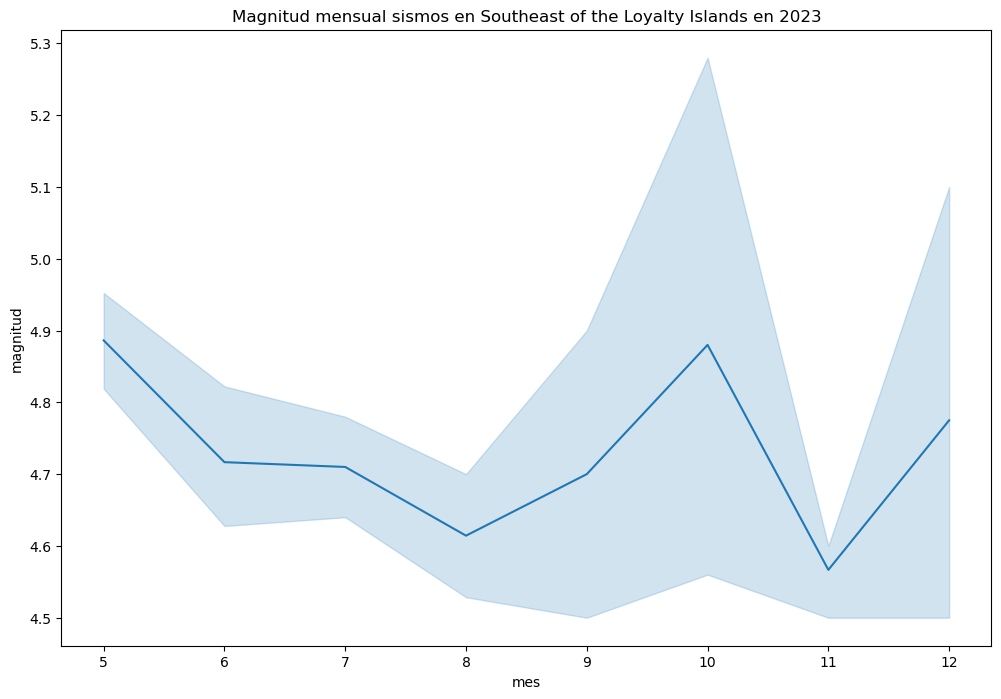

In [418]:
#GRAFICO DE LINEA PARA 

datos1 = datos.loc[((datos.lugar == 'southeast of the Loyalty Islands') & (datos.año == 2023)),['lugar','mes','año','magnitud']].reset_index(drop = True)
datos1
y1 = datos1.magnitud
x1 = datos1.mes

fig, ax = plt.subplots(figsize= (12,8))
sns.lineplot(data=datos, x=x1, y=y1 )
ax.set_title("Magnitud mensual sismos en Southeast of the Loyalty Islands en 2023")

plt.show()

#### **Histograma**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


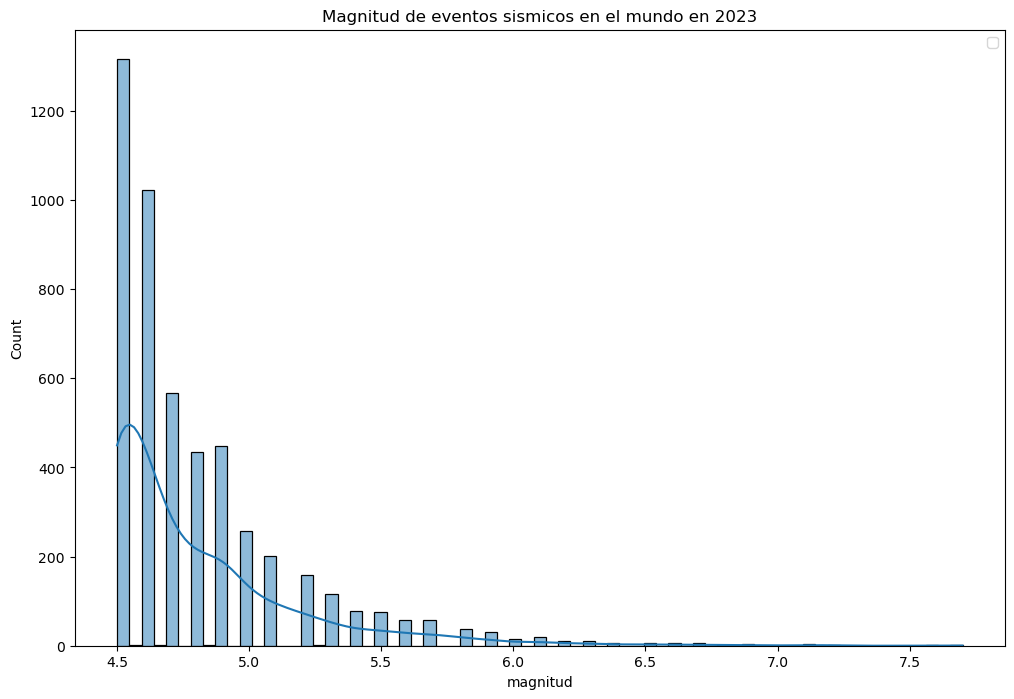

In [419]:
datos = datos.loc[(datos.año == 2023),['mes','magnitud','categoria_Richter', 'nivel_profundidad']].reset_index(drop = True)
y1 = datos.magnitud

fig, ax = plt.subplots(figsize= (12,8))
sns.histplot(data=datos, x=y1, kde=True )
ax.set_title("Magnitud de eventos sismicos en el mundo en 2023")

plt.show()

In [179]:
datos

,mes,magnitud,categoria_Richter,nivel_profundidad
0,5,4.9,Moderada,Intermedio
1,5,4.6,Moderada,Superficial
2,5,4.5,Moderada,Superficial
3,5,7.7,Mayor,Superficial
4,5,5.5,Moderada,Superficial
...,...,...,...,...
4949,12,4.9,Moderada,Superficial
4950,12,4.6,Moderada,Superficial
4951,12,4.6,Moderada,Superficial
4952,12,4.6,Moderada,Profundo


#### **Diagrama de Cajas**

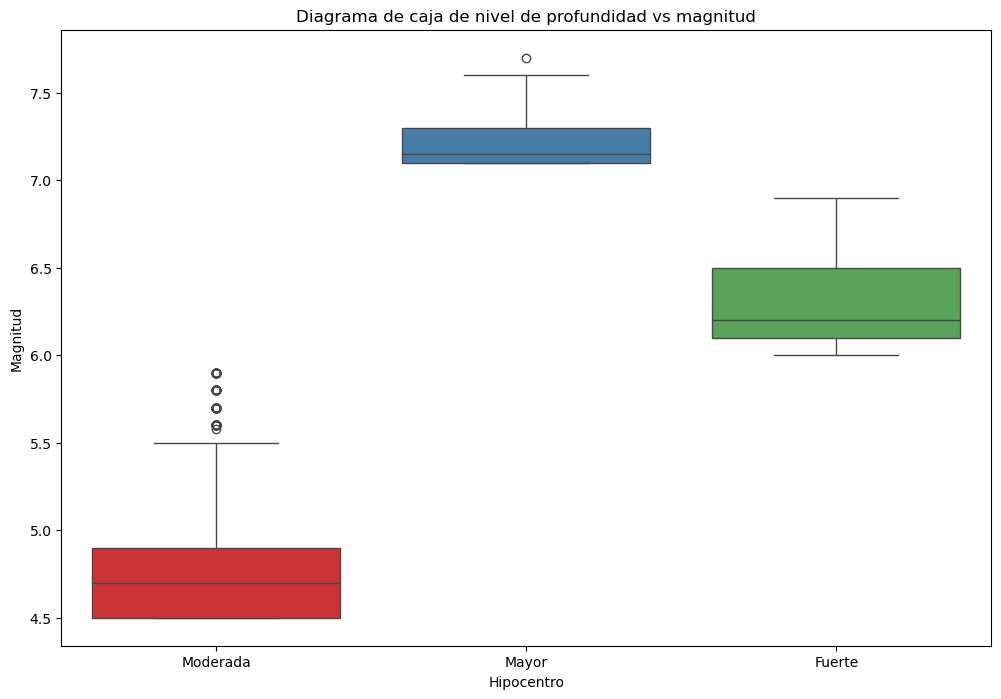

In [164]:
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(data=datos, x="categoria_Richter",
            y="magnitud", palette='Set1')

ax.set_ylabel("Magnitud")
ax.set_xlabel("Hipocentro")
ax.set_title("Diagrama de caja de nivel de 
            profundidad vs magnitud")


plt.show()

## **5. Conclusiones**

- La base de datos utilizada cuenta con el registro de 8103 eventos sismicos en el mundo durante el ultimo año y contiene información como lugar, fecha y hora, coordenadas, magnitud, profundidad, entre otros.

- El sismo de mayor magnitud registrado se dio en southeast of the Loyalty Islands con una magnitud de 7.7

- Entre mayo de 2023 y junio de 2024, en el mundo se han registrado 7962 sismos dentro de la categoría Moderada, 130 sismos dentro de la categoría Fuerte y 11 sismos con la categoría Mayor.

- Del total de sismos registrados en el mundo durante el ultimo año, 6371 fueron Superficiales, 1471 profundidad Intermedia y 261 fueron Profundos.

- Para el desarrollo del presente proyecto se crearon funciones, agrupaciones de datos y agregacion de nuevas columnas, utilizando diferentes funciones de librerias de python.

## **6. Recomendaciones**

- Se sugiere estandarizar ciertos procesos implementando funciones y bucles.

- Emplear procesos adicionales para validar de manera integral los datos.

- Relacionar la información proporcionada para la comparación de eventos de acuerdo a su ubicación geográfica.

## **6. Bibliografía**

- Pandas Development Team. (2024). Pandas documentation. Pandas. Retrieved April, 2024, from https://pandas.pydata.org/docs/

- Matplotlib Development Team. (2024). Matplotlib documentation. Matplotlib. Retrieved June 27, 2024, from https://matplotlib.org/stable/index.html

- Waskom, M. (2024). Seaborn documentation. Seaborn. Retrieved June 27, 2024, from https://seaborn.pydata.org/

- McKinney, W. (2017). Python para el análisis de datos (3a ed.). O'Reilly Media.

- USGS. (2022). Earthquake. Search earthquake catalog. In URL. https://earthquake.usgs.gov/earthquakes/ search/. 

- Robert, E., Wallace., James, F., Davis., Karen, C., McNally. (1984). Terms for expressing earthquake potential, prediction, and probability. Bulletin of the Seismological Society of America,  doi: 10.1785/BSSA0740051819
